(1000, 2)
(1000,)
(10000, 2)
(10000,)


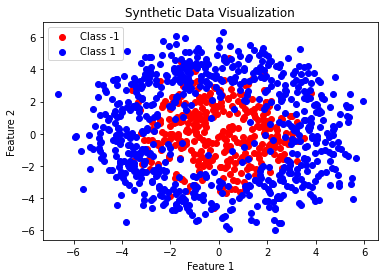

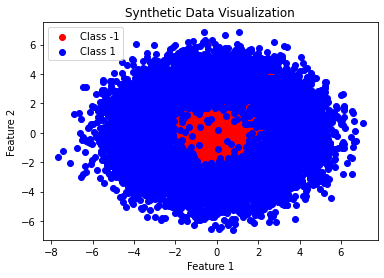

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10

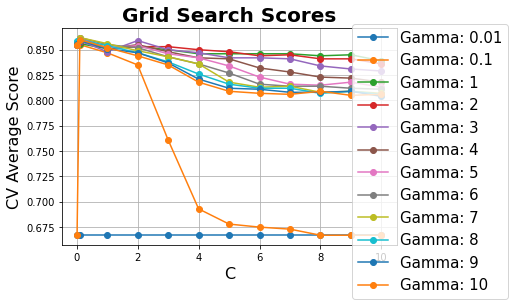

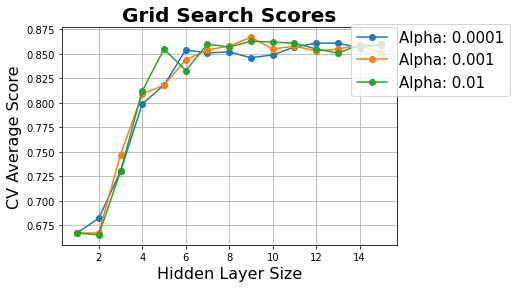

Error Probability: 0.1566


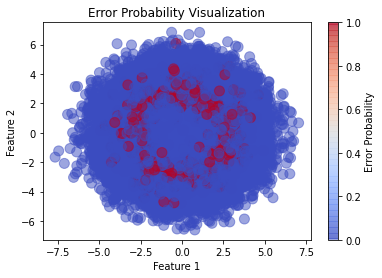

Error Probability: 0.1552


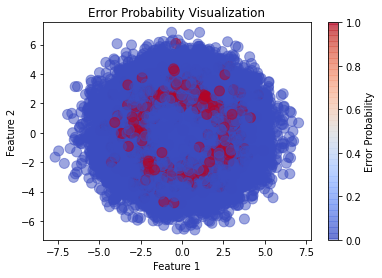

SVM best hyperparameters: {'C': 5, 'gamma': 0.1}
SVM test error probability: 0.1566
MLP best hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (9,)}
MLP test error probability: 0.1552


In [9]:
import numpy as np
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

def quadratic_activation(x):
    return K.pow(x, 2)

get_custom_objects().update({'quadratic': Activation(quadratic_activation)})

def create_mlp_model(input_dim, num_perceptrons, activation='quadratic'):
    model = Sequential()
    model.add(Dense(num_perceptrons, input_dim=input_dim, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#  perform grid search for hyperparameters
def perform_grid_search(model, param_grid, X, y):
    cv = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X, y)
    return grid_search

plotData = True
n = 2
Ntrain = 1000
Ntest = 10000
ClassPriors = [0.35, 0.65]
r0 = 2
r1 = 4
sigma = 1

def generate_data(N):
    data_labels = np.random.choice([-1, 1], N, replace=True, p=ClassPriors)  # Changed 0,1 to -1,1
    ind0 = np.where(data_labels == -1)[0]
    ind1 = np.where(data_labels == 1)[0]
    N0 = ind0.shape[0]
    N1 = ind1.shape[0]
    theta0 = np.random.uniform(-np.pi, np.pi, N0)  # Changed from standard_normal to uniform
    theta1 = np.random.uniform(-np.pi, np.pi, N1)  # Changed from standard_normal to uniform
    x0 = sigma * np.random.randn(N0, n) + r0 * np.column_stack((np.cos(theta0), np.sin(theta0)))  # Fixed noise scaling
    x1 = sigma * np.random.randn(N1, n) + r1 * np.column_stack((np.cos(theta1), np.sin(theta1)))  # Fixed noise scaling
    data_features = np.zeros((N, n))
    data_features[ind0, :] = x0
    data_features[ind1, :] = x1
    return data_features, data_labels

#  visualize the synthetic data
def visualize_synthetic_data(X, y):
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')  # Changed label to 'Class 1'
    plt.title('Synthetic Data Visualization')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    
n_samples_train = 1000  
n_samples_test = 10000  
X_train, y_train = generate_data(Ntrain)
X_test, y_test =  generate_data(Ntest)


# Visualize the generated data
visualize_synthetic_data(X_train, y_train)
visualize_synthetic_data(X_test, y_test)

# Define the models
svm_model = SVC(kernel='rbf')
mlp_model = MLPClassifier(max_iter=1000)

# # Perform K-Fold cross-validation to find the best hyperparameters for both models
# def perform_grid_search(model, param_grid, X, y):
#     cv = StratifiedKFold(n_splits=10)
#     grid_search = GridSearchCV(model, param_grid, cv=cv, return_train_score=True)
#     grid_search.fit(X, y)
#     return grid_search

# grid search for both models
param_grid_svm = {'C': [0.01, 0.1, 1, 2,3,4, 5,6,7,8,9,10], 'gamma': [0.01, 0.1, 1, 2,3,4, 5,6,7,8,9, 10]}
param_grid_mlp = {
    'hidden_layer_sizes': [(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,),(12,),(13,), (14,), (15,)], # Example sizes, you can choose different sizes
    'activation': ['relu'],  # Assuming the use of the custom quadratic activation
    'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    # Add other hyperparameters if needed, like learning rate 'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search_svm = perform_grid_search(svm_model, param_grid_svm, X_train, y_train)
grid_search_mlp = perform_grid_search(mlp_model, param_grid_mlp, X_train, y_train)

# Visualize the results of the grid search
def plot_grid_search1(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    scores_mean = cv_results['mean_test_score']
    if len(grid_param_2) > 1:
        scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))
    else:
        scores_mean = np.array(scores_mean).reshape(len(grid_param_1),len(grid_param_2))

    scores_mean = scores_mean.T  

    _, ax = plt.subplots(1,1)

    if len(grid_param_2) > 1:
        for idx, val in enumerate(grid_param_2):
            ax.plot(grid_param_1, scores_mean[:, idx], '-o', label= name_param_2 + ': ' + str(val))
    else:
        ax.plot(grid_param_1, scores_mean, '-o')

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    if len(grid_param_2) > 1:
        ax.legend(loc="best", fontsize=15)
    ax.legend(loc='upper center', bbox_to_anchor=(1.1, 1.05), fontsize=15)

    ax.grid('on')
    
# plot the grid search
plot_grid_search1(grid_search_svm.cv_results_, param_grid_svm['C'], param_grid_svm['gamma'], 'C', 'Gamma')
plot_grid_search1(grid_search_mlp.cv_results_, [param[0] for param in param_grid_mlp['hidden_layer_sizes']], param_grid_mlp['alpha'], 'Hidden Layer Size', 'Alpha')
plt.show()

# Calculate and visualize error probability on test data
def plot_error_probability(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    error_indices = (y_pred != y_test)

    # Calculate error probability
    error_probability = np.mean(error_indices)
    print(f"Error Probability: {error_probability}")

    # Visualize errors
    plt.scatter(X_test[:, 0], X_test[:, 1], c=error_indices, cmap='coolwarm', s=100, alpha=0.5)
    plt.title('Error Probability Visualization')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Error Probability')
    plt.show()

    return error_probability

# Visualize error probability for both models
error_probability_svm = plot_error_probability(grid_search_svm.best_estimator_, X_test, y_test)
error_probability_mlp = plot_error_probability(grid_search_mlp.best_estimator_, X_test, y_test)


print(f"SVM best hyperparameters: {grid_search_svm.best_params_}")
print(f"SVM test error probability: {error_probability_svm}")
print(f"MLP best hyperparameters: {grid_search_mlp.best_params_}")
print(f"MLP test error probability: {error_probability_mlp}")


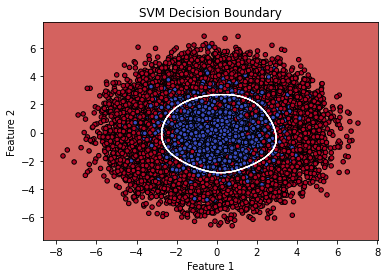

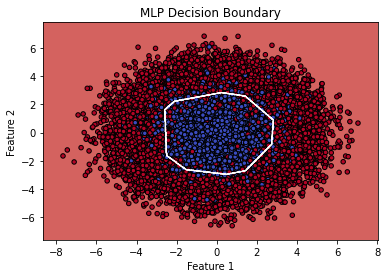

In [11]:
def plot_decision_boundaries1(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.contour(xx, yy, Z, colors='white', linewidths=1) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
# Visualize decision boundaries 
plot_decision_boundaries1(X_test, y_test, grid_search_svm.best_estimator_, 'SVM Decision Boundary')
plot_decision_boundaries1(X_test, y_test, grid_search_mlp.best_estimator_, 'MLP Decision Boundary')
